![Astrofisica Computacional](../logo.PNG)

## Potencial Gravitacional en el Interior de una Enana Blanca
---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

En este ejercicio se modelará el potencial gravitacional en el interior de una enana blanca. Al considerar equilibrio hidrostático con simetría esférica, las funciones involucradas en la estructura interna son
- $M = M(r)$
- $v = v_r =$ constante
- $f = - \frac{GM \rho}{ r^2}$

y las ecuaciones de la hidrodinámica serán

\begin{align}
\frac{dP}{dr} = - \frac{GM(r)}{r^2} \rho \hspace{1cm} & \textrm{Equilibrio hidrostático}\\
\frac{dM}{dr} = 4\pi \rho r^2 \hspace{1cm} & \textrm{Conservación de la masa}
\end{align}

junto con una ecuación de estado del tipo politrópico,

\begin{equation}
P = K \rho ^\Gamma,
\end{equation}

donde $K$ se denomina la *constante politrópica* y $\Gamma$ es el *índice adiabático* (i.e. la razón entre los calores específicos).

Un modelo relativista de una enana blanca completamente degenerada da como resultado los siguientes valores de las constantes en al ecuación de estado

\begin{align}
K = &1.244 \times 10^{15} \times (0.5)^\Gamma \textrm{ dinas cm}^{-2} \left(\textrm{g}^{-1} \textrm{cm}^3\right)^\Gamma \\
\Gamma = &\frac{4}{3}
\end{align}

Como se discutió antes, la integración de las ecuaciones diferenciales se lleva a cabo desde el punto central de la estrella hasta el punto que define su superficie. Con ello se encuentran las funciones $M(r)$, $\rho (r)$ y $P(r)$. Las condiciones iniciales se tomarán como:

- Densidad en el centro de la estrella: $\rho_c = 10^{10} \textrm{ g cm}^{-3}$
- Presión en el centro de la estrella : $P_c = K \rho_c ^\Gamma$
- Masa en el centro de la estrella : $M(r=0) = 0$

La integración se realizará hasta la superficie de la estrella, al cual está definida por el radio $R_*$ en el cual la presión es suficientemente pequeña,

- Presión en la superficie de la estrella: $P (r = R_*) = 10^{-10} P_c$



In [72]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
%matplotlib inline

In [73]:
# Constantes y parametos globales para las enanas blancas
G = 6.67e-8 # [dyn cm^2 g^-2]
Msun  = 1.99e33 # [g]
au_in_cm = 1.496e+13 # [cm]
Gamma = 4.0/3.0 # Indice adiabatico
K = 1.244e15*(0.5**Gamma) # Constante politrópica [dyn cm^2 g^3/4]

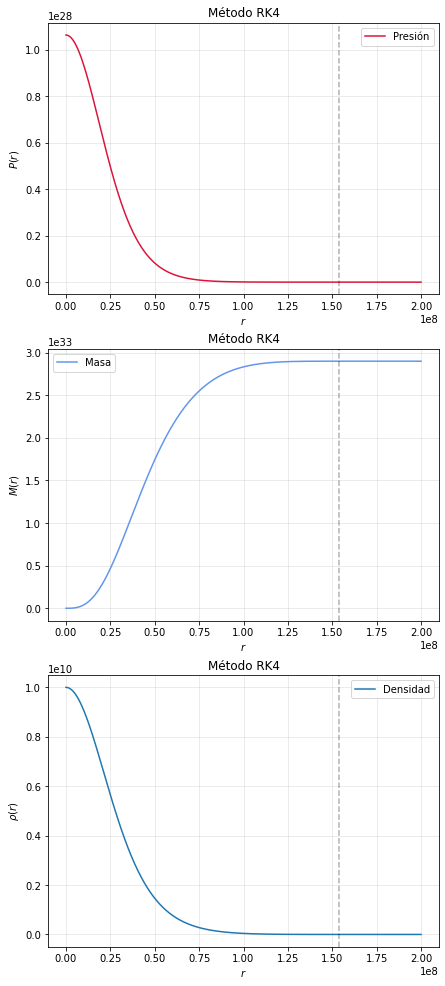

Radio de la estrella de neutrones: 1.0278e-05 au
Masa total: 1.46 Masas Solares

 



In [74]:
# Ecuaciones diferenciales
def ODE(r, q):
    '''
    q: Variables de estado
    Presion = q[0]
    Masa = q[1]
    '''
    p = q[0]
    m = q[1]
    # Ecuación de estado para incluir rho en las ecuaciones diferenciales
    rho = (p/K)**(1/Gamma)

    rhs = np.zeros(2)
    if(r > 1.0e-10): # Para remover la singularidad en r=0
        rhs[0] = -G*m*rho/(r**2) #Equilibrio hidrostatico
        rhs[1] = 4*pi*rho*r**2 #Conservación de la masa
    else:
        rhs[0] = 0.0
        rhs[1] = 0.0
    return rhs


# Método Runge-Kutta 4
def RK4(ODE, r, dr, q):
    '''
    ------------------------------------------
    RK4(ODE, r, dr, q):
    ------------------------------------------
    4th Order Runge-Kutta method for solving 
    a system of ODEs.
    Arguments:
    ODE: function defining the system of ODEs
    ------------------------------------------
    '''
    newq = np.zeros(2)
    k1 = dr*ODE(r, q)
    k2 = dr*ODE(r + dr/2, q + k1/2)
    k3 = dr*ODE(r + dr/2, q + k2/2)
    k4 = dr*ODE(r + dr, q + k3)
    newq = q + (k1 + 2*k2 + 2*k3 + k4)/6

    return newq


# Establece el grid para la integración
npoints = 1000
r_max = 2.0e8 # Radio maximo de 2000 km = 2e8 cm
radius = np.linspace(0, r_max, npoints)
dr = radius[1]-radius[0]

# Establece las variables
q = np.zeros([npoints,2]) #Presion:0,Masa:1
rho   = np.zeros(npoints)



#### Condiciones Iniciales ####
rho[0]   = 1.0e10 # [g/cm^3]
q[0,0] = K * rho[0]**Gamma # [dyn/cm^2]
q[0,1]  = 0.0 # [g]

#### Critero para terminar la integración (surface pressure) ####
press_min = 1.0e-10 * q[0,0] 


# Esta variable guardará el índice que define la superficie estelar
n = 0 
# Loop Principal
while q[n,0]>press_min: # Chequear el criterio de terminación
    q[n+1,0],q[n+1,1] = RK4(ODE, radius[n], dr, q[n])
    rho[n+1] = (q[n+1,0]/K)**(1/Gamma)
    n +=1

# Despues de alcanzar el criterio de finalizacion
# las funciones dejan de cambiar
for i in range(n+1, npoints):
    q[i,0] = q[n,0]
    rho[i]   = rho[n]
    q[i,1]  = q[n,1]

    
# Figura presión vs r
fig, ax = plt.subplots(3,1, figsize=(7,17))
ax[0].plot(radius, q[:,0], color='crimson', label='Presión')
ax[0].set_title('Método RK4')
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$P(r)$')
ax[0].axvline(radius[n], color='black',alpha=0.3, linestyle='--')
ax[0].legend()
ax[0].grid(alpha=0.3)

# Figura masa vs r
ax[1].plot(radius, q[:,1], color='cornflowerblue', label='Masa')
ax[1].set_title('Método RK4')
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$M(r)$')
ax[1].axvline(radius[n], color='black',alpha=0.3, linestyle='--')
ax[1].legend()
ax[1].grid(alpha=0.3)

# Figura densidad vs r
ax[2].plot(radius, rho, label='Densidad')
ax[2].set_title('Método RK4')
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$\rho(r)$')
ax[2].axvline(radius[n], color='black',alpha=0.3, linestyle='--')
ax[2].legend()
ax[2].grid(alpha=0.3)

plt.show()

R = radius[n]
M = q[n,1]

print(f'Radio de la estrella de neutrones: {radius[n]/au_in_cm:.4e} au')
print(f'Masa total: {q[n,1]/Msun:.2f} Masas Solares')
print('\n \n')


In [75]:
### Función de densidad de masa ###
rho

array([1.00000000e+10, 9.99950649e+09, 9.99831582e+09, 9.99634082e+09,
       9.99357826e+09, 9.99002832e+09, 9.98569187e+09, 9.98057015e+09,
       9.97466466e+09, 9.96797715e+09, 9.96050961e+09, 9.95226427e+09,
       9.94324358e+09, 9.93345023e+09, 9.92288714e+09, 9.91155744e+09,
       9.89946449e+09, 9.88661188e+09, 9.87300341e+09, 9.85864309e+09,
       9.84353516e+09, 9.82768407e+09, 9.81109446e+09, 9.79377120e+09,
       9.77571934e+09, 9.75694415e+09, 9.73745108e+09, 9.71724580e+09,
       9.69633414e+09, 9.67472214e+09, 9.65241601e+09, 9.62942214e+09,
       9.60574711e+09, 9.58139766e+09, 9.55638070e+09, 9.53070331e+09,
       9.50437273e+09, 9.47739635e+09, 9.44978172e+09, 9.42153653e+09,
       9.39266863e+09, 9.36318600e+09, 9.33309675e+09, 9.30240912e+09,
       9.27113149e+09, 9.23927236e+09, 9.20684033e+09, 9.17384413e+09,
       9.14029259e+09, 9.10619466e+09, 9.07155936e+09, 9.03639582e+09,
       9.00071327e+09, 8.96452101e+09, 8.92782843e+09, 8.89064497e+09,
      

### **Distribución de masa de la enana blanca**

In [76]:
from scipy.interpolate import interp1d

rho_interp = interp1d(radius,rho)

In [77]:
rho_interp(1.3e8)

array(1864531.73497626)

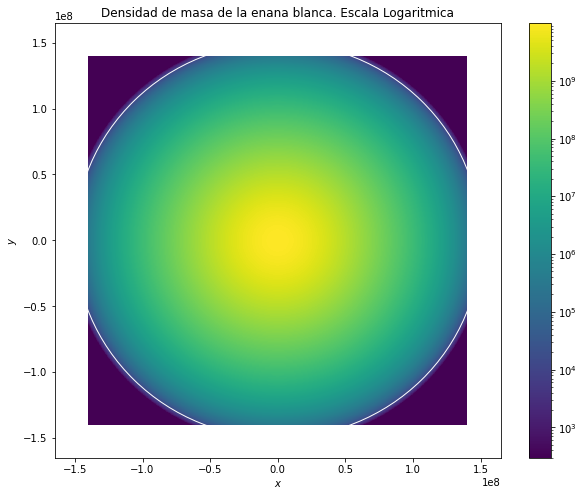

In [78]:
n_pix = 1000
rm = 1.4e8

x = np.linspace(-rm,rm, n_pix)
y = np.linspace(-rm,rm, n_pix)

density_mat = np.zeros([n_pix,n_pix])

for i in range(n_pix):
    for j in range(n_pix):
        r = np.sqrt(x[i]**2 + y[j]**2)
        density_mat[i,j] = rho_interp(r)

import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(10,8))
densplot = ax.pcolormesh(x, y, density_mat[1:,1:], norm=colors.LogNorm())
circle = plt.Circle((0, 0), 1.5e8,color='w', fill=False)
ax.add_patch(circle)
ax.set_title('Densidad de masa de la enana blanca. Escala Logaritmica')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(densplot)

plt.show()



## Potencial Gravitacional en el interior

Consideraremos la ecuación de Poisson

\begin{equation}
\nabla ^2 \phi (t,x,y,z) = 4\pi G \rho (t,x,y,z)
\end{equation}

donde $\phi(t,x,y,z)$ es el potencial gravitacional y $\rho(t,x,y,z)$ representa la densidad de masa. Utilizando un sistema de unidades con 

- Unidades de tiempo : años (yr)
- Unidades de masa : Masas solares($M_{\odot}$)
- Unidades de distancia : Unidades Astronómicas (au)

se tiene el valor $G=4\pi^2 \textrm{au}^3 \textrm{yr}^{-2} M_{\odot}^{-1}$.

Al imponer que el sistema es estático y tiene simetría esférica, la ecuación se transforma en

\begin{equation}
\frac{1}{r^2} \frac{d}{dr} \left( r^2 \frac{d\phi (r)}{dr} \right) = 4\pi G \rho (r)
\end{equation}

en donde las derivadas parciales se han convertido end erivadas totales debido a la dependencia de las funciones involucradas.

Ya que vamos a utilizar un interador Runge-Kutta 4, debemos re-escribir la relación diferencial como un sistema de ecuaciones de primer orden,

\begin{align}
\frac{d\phi}{dr} = & \frac{1}{r^2} u\\
\frac{du}{dr} = & 4 \pi G r^2 \rho
\end{align}

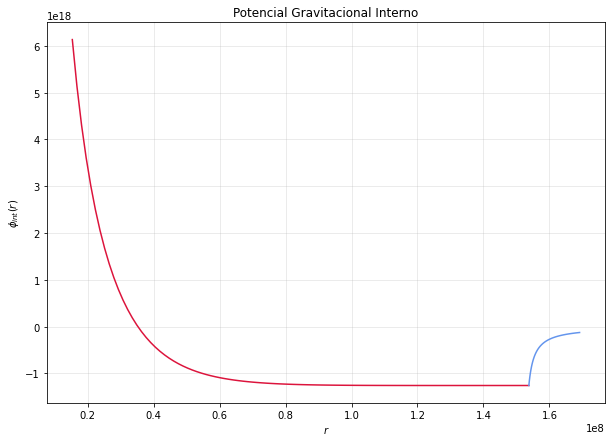

8258085646.61448


In [71]:

# Ecuaciones diferenciales
def ODE(r, q):
    '''
    q: Variables involucradas
    phi = q[0]
    u = q[1]
    '''
    phi = q[0]
    u = q[1]

    f = np.zeros(2)
    f[0] = u/(r**2)
    f[1] = 4*np.pi*G*rho_interp(r)*r**2
    return f



# Método Runge-Kutta 4
def RK4(ODE, r, dr, q):
    '''
    ------------------------------------------
    RK4(ODE, r, dr, q):
    ------------------------------------------
    4th Order Runge-Kutta method for solving 
    a system of ODEs.
    Arguments:
    ODE: function defining the system of ODEs
    ------------------------------------------
    '''
    newq = np.zeros(2)
    k1 = dr*ODE(r, q)
    k2 = dr*ODE(r + dr/2, q + k1/2)
    k3 = dr*ODE(r + dr/2, q + k2/2)
    k4 = dr*ODE(r + dr, q + k3)
    newq = q + (k1 + 2*k2 + 2*k3 + k4)/6

    return newq



# Establece el grid para la integración
npoints = 100
r_int = np.linspace(R,R/10, npoints)
dr = r_int[1]-r_int[0]
# Establece las variables
q_int = np.zeros([npoints,2]) 

def phi_ext(r):
    return - G*M/r


#### Condiciones Iniciales ####
z =  (phi_ext(R+dr)-phi_ext(R))/dr #G*M/(R**2)
q_int[0,0] = -G*M/R
q_int[0,1]  = z # Ansatz

for i in range(len(r_int)-1):
    q_int[i+1] = RK4(ODE, r_int[i], dr, q_int[i])
    



r_ext = np.linspace(R, 1.1*R, 100)

# Figura potencial interno vs r
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(r_int, q_int[:,0], color='crimson')
ax.plot(r_ext, phi_ext(radius), color='cornflowerblue')

ax.set_title('Potencial Gravitacional Interno')
#ax.set_xlim(1.537e8, 1.538e8)
#ax.set_ylim(-1.40e18, -1.e18)


#ax.set_yscale('log')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$\phi_{int}(r)$')
ax.grid(alpha=0.3)

plt.show()
print(z)

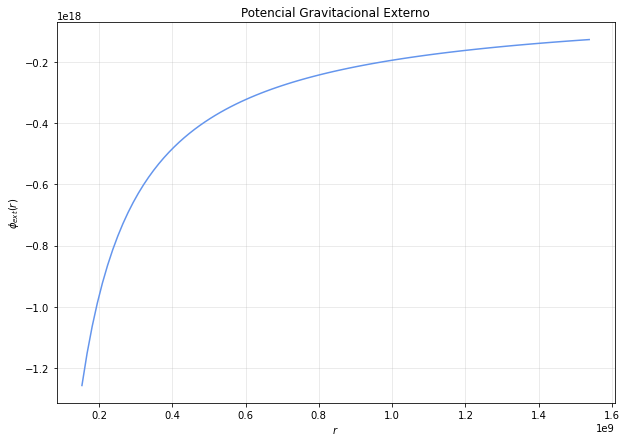

In [42]:
def phi_ext(r):
    return -G*M/r

r_ext = np.linspace(R, 10*R, 100)

# Figura potencial externo vs r
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(r_ext, phi_ext(radius), color='cornflowerblue')
ax.set_title('Potencial Gravitacional Externo')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$\phi _{ext}(r)$')
ax.grid(alpha=0.3)

plt.show()